In [38]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
# plt.style.use('bmh')

In [39]:
data = pd.read_csv('air-traffic-prediction/AirtrafficA4.csv')
data['PASSENGERS CARRIED'] = pd.to_numeric(data['PASSENGERS CARRIED'].str.replace(',', ''))
data[' FREIGHT CARRIED (IN TONNE)'] = pd.to_numeric(data[' FREIGHT CARRIED (IN TONNE)'].str.replace(',', ''))
data['MAIL CARRIED (IN TONNE)'] = pd.to_numeric(data['MAIL CARRIED (IN TONNE)'].str.replace(',', ''))
data['HOURS FLOWN'] = pd.to_numeric(data['HOURS FLOWN'].str.replace(',', ''))
data['KILOMETRE FLOWN'] = pd.to_numeric(data['KILOMETRE FLOWN'].str.replace(',', ''))
data['TOTAL DEPARTURES'] = pd.to_numeric(data['TOTAL DEPARTURES'].str.replace(',', ''))
data['AVAILABLE SEAT KILOMETRE (IN THOUSAND)'] = pd.to_numeric(data['AVAILABLE SEAT KILOMETRE (IN THOUSAND)'].str.replace(',', ''))
data["YEAR_MONTH"] = pd.to_datetime(data['YEAR'].astype(str) + '-' + data['MONTH'].str[:3] + '-01', format='%Y-%b-%d')
data.set_index("YEAR_MONTH", inplace=True)
data = data.sort_values(by='YEAR_MONTH', kind='mergesort')
data

,AIRLINE,YEAR,MONTH,TOTAL DEPARTURES,HOURS FLOWN,KILOMETRE FLOWN,PASSENGERS CARRIED,AVAILABLE SEAT KILOMETRE (IN THOUSAND),FREIGHT CARRIED (IN TONNE),MAIL CARRIED (IN TONNE)
YEAR_MONTH,,,,,,,,,,
2013-01-01,A007,2013,JAN,10552.0,18655.0,10112.0,1408012.0,1820105.0,6465.0,0.0
2013-02-01,A007,2013,FEB,9873.0,17374.0,9439.0,1341210.0,1698930.0,6235.0,0.0
2013-03-01,A007,2013,MAR,11393.0,20093.0,11028.0,1423569.0,1984886.0,6505.0,0.0
2013-04-01,A007,2013,APR,11426.0,20084.0,11090.0,1511094.0,1996084.0,5903.0,0.0
2013-05-01,A007,2013,MAY,11885.0,20779.0,11533.0,1685168.0,2075882.0,7345.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-04-01,A007,2023,APR,48752.0,84232.0,42615.0,7406440.0,8005648.0,19432.8,2102.9
2023-05-01,A007,2023,MAY,50956.0,87917.0,44505.0,8109626.0,8375201.0,24165.1,2102.4
2023-06-01,A007,2023,JUNE,49989.0,86217.0,43739.0,7893296.0,8254272.0,23522.6,2383.0


In [40]:
passengers = data['PASSENGERS CARRIED'].dropna()
passengers

YEAR_MONTH
2013-01-01    1408012.0
2013-02-01    1341210.0
2013-03-01    1423569.0
2013-04-01    1511094.0
2013-05-01    1685168.0
                ...    
2023-04-01    7406440.0
2023-05-01    8109626.0
2023-06-01    7893296.0
2023-07-01    7674890.0
2023-08-01    7867259.0
Name: PASSENGERS CARRIED, Length: 127, dtype: float64

In [41]:
formatted_data = ", ".join(" ".join(list(str(int(val)))) for val in passengers)
formatted_data

'1 4 0 8 0 1 2, 1 3 4 1 2 1 0, 1 4 2 3 5 6 9, 1 5 1 1 0 9 4, 1 6 8 5 1 6 8, 1 4 8 0 8 7 9, 1 4 4 5 2 4 8, 1 5 3 1 4 0 6, 1 3 7 8 6 9 1, 1 5 1 0 1 8 4, 1 4 6 7 7 6 3, 1 5 7 5 8 7 2, 1 4 2 6 5 8 0, 1 4 6 4 0 7 0, 1 6 0 1 1 4 1, 1 6 7 9 9 6 3, 1 9 0 8 3 3 4, 1 7 9 7 1 0 1, 1 5 9 9 9 7 7, 1 8 5 8 6 6 4, 1 9 0 7 3 7 8, 1 8 9 0 2 7 3, 1 9 6 7 9 9 2, 2 3 2 4 2 2 1, 2 2 7 6 4 0 4, 2 2 3 0 6 4 5, 2 2 8 6 1 2 8, 2 4 8 1 2 8 5, 2 7 6 9 2 8 3, 2 5 3 6 5 5 4, 2 4 1 6 9 1 6, 2 3 8 4 9 4 3, 2 4 3 0 4 4 9, 2 5 8 9 8 6 1, 2 5 9 7 7 6 5, 2 7 4 3 3 2 5, 2 7 2 5 7 1 1, 2 7 5 4 1 3 1, 3 0 2 3 2 2 8, 3 0 6 6 5 5 6, 3 3 3 6 8 3 9, 3 0 2 3 0 8 1, 3 3 8 3 7 6 8, 3 3 4 1 0 8 1, 3 2 9 5 8 2 6, 3 6 9 2 8 2 8, 3 7 7 2 5 8 3, 3 8 4 8 3 2 2, 3 8 0 9 2 2 8, 3 4 1 8 6 0 5, 3 6 1 1 3 7 1, 3 7 7 8 7 8 0, 4 1 9 0 9 1 4, 3 8 2 5 8 1 4, 3 6 9 9 4 5 1, 3 6 7 8 2 4 5, 3 6 6 4 5 0 9, 4 1 3 3 0 2 7, 4 1 3 1 8 4 4, 4 4 3 0 0 7 0, 4 5 5 6 9 0 4, 4 2 9 0 1 8 9, 4 5 7 6 2 3 6, 4 5 7 9 9 1 6, 4 8 5 2 9 0 9, 4 6 7 2 6 8 6, 5 0 0 2 4

In [42]:
prompt = f"Given the following data for air passengers by month, where each  is separated by a comma: {formatted_data} .Predict the next 12 values yourself without giving me the code for it."
print(prompt)

Given the following data for air passengers by month, where each  is separated by a comma: 1 4 0 8 0 1 2, 1 3 4 1 2 1 0, 1 4 2 3 5 6 9, 1 5 1 1 0 9 4, 1 6 8 5 1 6 8, 1 4 8 0 8 7 9, 1 4 4 5 2 4 8, 1 5 3 1 4 0 6, 1 3 7 8 6 9 1, 1 5 1 0 1 8 4, 1 4 6 7 7 6 3, 1 5 7 5 8 7 2, 1 4 2 6 5 8 0, 1 4 6 4 0 7 0, 1 6 0 1 1 4 1, 1 6 7 9 9 6 3, 1 9 0 8 3 3 4, 1 7 9 7 1 0 1, 1 5 9 9 9 7 7, 1 8 5 8 6 6 4, 1 9 0 7 3 7 8, 1 8 9 0 2 7 3, 1 9 6 7 9 9 2, 2 3 2 4 2 2 1, 2 2 7 6 4 0 4, 2 2 3 0 6 4 5, 2 2 8 6 1 2 8, 2 4 8 1 2 8 5, 2 7 6 9 2 8 3, 2 5 3 6 5 5 4, 2 4 1 6 9 1 6, 2 3 8 4 9 4 3, 2 4 3 0 4 4 9, 2 5 8 9 8 6 1, 2 5 9 7 7 6 5, 2 7 4 3 3 2 5, 2 7 2 5 7 1 1, 2 7 5 4 1 3 1, 3 0 2 3 2 2 8, 3 0 6 6 5 5 6, 3 3 3 6 8 3 9, 3 0 2 3 0 8 1, 3 3 8 3 7 6 8, 3 3 4 1 0 8 1, 3 2 9 5 8 2 6, 3 6 9 2 8 2 8, 3 7 7 2 5 8 3, 3 8 4 8 3 2 2, 3 8 0 9 2 2 8, 3 4 1 8 6 0 5, 3 6 1 1 3 7 1, 3 7 7 8 7 8 0, 4 1 9 0 9 1 4, 3 8 2 5 8 1 4, 3 6 9 9 4 5 1, 3 6 7 8 2 4 5, 3 6 6 4 5 0 9, 4 1 3 3 0 2 7, 4 1 3 1 8 4 4, 4 4 3 0 0 7 0, 4 5 5 6 9

In [43]:
# save the prompt in a file
with open("prompt.txt", "w") as file:
    file.write(prompt)

In [44]:
prompt_response = "7 8 3 2 8 4 2, 8 0 9 8 7 1 3, 8 3 4 2 1 9 5, 8 5 7 6 5 2 0, 8 6 1 8 3 4 9, 8 8 4 9 6 7 4, 8 9 0 3 9 5 1, 9 1 5 4 8 8 2, 9 3 7 6 5 0 9, 9 5 2 8 2 6 4, 9 7 6 1 3 4 8, 9 8 0 7 5 8 3"

In [45]:
prompt_response = prompt_response.replace(" ", "")
prompt_response = prompt_response.split(",")
prompt_response = np.array([int(val) for val in prompt_response])
prompt_response

array([7832842, 8098713, 8342195, 8576520, 8618349, 8849674, 8903951,
       9154882, 9376509, 9528264, 9761348, 9807583])

In [46]:
def make_dataframe(forecast):
	forecast_df = pd.DataFrame(forecast, columns=['PASSENGERS CARRIED'])
	forecast_df['YEAR_MONTH'] = ('2023 SEP', '2023 OCT', '2023 NOV', '2023 DEC', '2024 JAN', '2024 FEB', '2024 MAR', '2024 APR', '2024 MAY', '2024 JUN', '2024 JUL', '2024 AUG')
	forecast_df = forecast_df.reindex(columns = ['YEAR_MONTH', 'PASSENGERS CARRIED'])
	return forecast_df

In [62]:
forecast_df = make_dataframe(prompt_response)
forecast_df.to_csv("submission_prompt.csv", index=False)
forecast_df

,YEAR_MONTH,PASSENGERS CARRIED
0,2023 SEP,7832842
1,2023 OCT,8098713
2,2023 NOV,8342195
3,2023 DEC,8576520
4,2024 JAN,8618349
5,2024 FEB,8849674
6,2024 MAR,8903951
7,2024 APR,9154882
8,2024 MAY,9376509
9,2024 JUN,9528264


In [48]:
from prophet import Prophet

In [49]:
model = Prophet()
data['ds'] = data.index
data['y'] = data['PASSENGERS CARRIED']

model.fit(data)

19:46:28 - cmdstanpy - INFO - Chain [1] start processing
19:46:28 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
future = model.make_future_dataframe(periods=12, freq='MS')
future.tail(20)

,ds
120,2023-01-01
121,2023-02-01
122,2023-03-01
123,2023-04-01
124,2023-05-01
125,2023-06-01
126,2023-07-01
127,2023-08-01
128,2023-09-01
129,2023-10-01


In [51]:
forecast = model.predict(future)
forecast.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
128,2023-09-01,6.348012e+06,4.513792e+06,7.658122e+06,6.348012e+06,6.348012e+06,-276341.314923,-276341.314923,-276341.314923,-276341.314923,-276341.314923,-276341.314923,0.0,0.0,0.0,6.071671e+06
129,2023-10-01,6.386175e+06,4.874038e+06,7.952130e+06,6.386175e+06,6.386175e+06,52141.412854,52141.412854,52141.412854,52141.412854,52141.412854,52141.412854,0.0,0.0,0.0,6.438316e+06
130,2023-11-01,6.425609e+06,5.037198e+06,8.231833e+06,6.425609e+06,6.425609e+06,198843.534832,198843.534832,198843.534832,198843.534832,198843.534832,198843.534832,0.0,0.0,0.0,6.624453e+06
131,2023-12-01,6.463772e+06,5.273082e+06,8.474370e+06,6.463772e+06,6.463772e+06,464785.722766,464785.722766,464785.722766,464785.722766,464785.722766,464785.722766,0.0,0.0,0.0,6.928558e+06
132,2024-01-01,6.503207e+06,5.029634e+06,8.359582e+06,6.503206e+06,6.503207e+06,134467.706891,134467.706891,134467.706891,134467.706891,134467.706891,134467.706891,0.0,0.0,0.0,6.637674e+06
133,2024-02-01,6.542641e+06,5.017653e+06,8.000663e+06,6.542641e+06,6.542641e+06,6444.343632,6444.343632,6444.343632,6444.343632,6444.343632,6444.343632,0.0,0.0,0.0,6.549086e+06
134,2024-03-01,6.579532e+06,5.192545e+06,8.211832e+06,6.579532e+06,6.579532e+06,129134.968017,129134.968017,129134.968017,129134.968017,129134.968017,129134.968017,0.0,0.0,0.0,6.708667e+06
135,2024-04-01,6.618966e+06,5.321016e+06,8.402067e+06,6.618966e+06,6.618967e+06,195366.973521,195366.973521,195366.973521,195366.973521,195366.973521,195366.973521,0.0,0.0,0.0,6.814333e+06
136,2024-05-01,6.657129e+06,4.900796e+06,8.060327e+06,6.657129e+06,6.657129e+06,-219036.975782,-219036.975782,-219036.975782,-219036.975782,-219036.975782,-219036.975782,0.0,0.0,0.0,6.438092e+06
137,2024-06-01,6.696564e+06,4.780156e+06,8.055594e+06,6.696563e+06,6.696564e+06,-306870.797759,-306870.797759,-306870.797759,-306870.797759,-306870.797759,-306870.797759,0.0,0.0,0.0,6.389693e+06


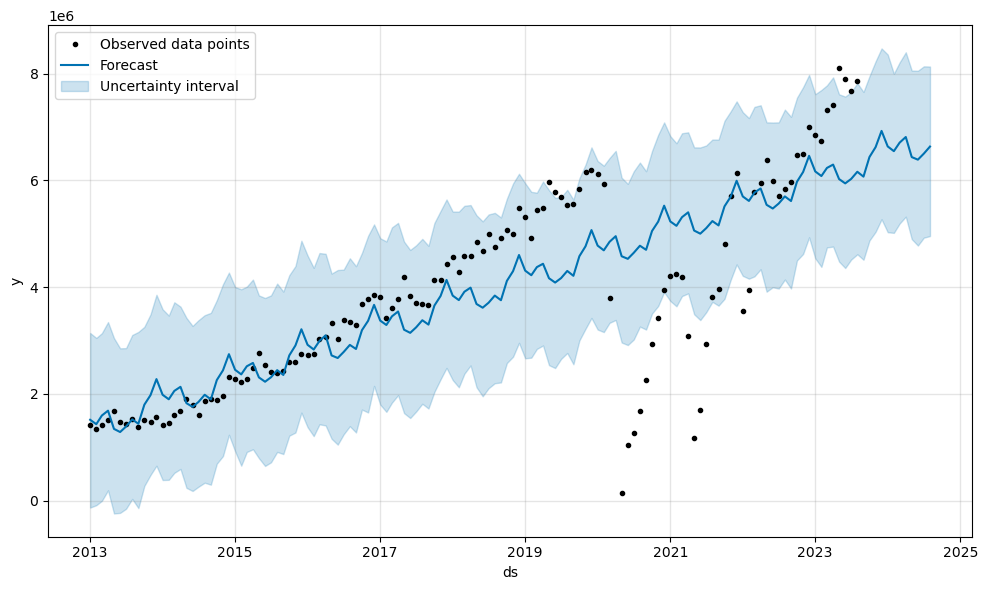

In [52]:
fig = model.plot(forecast, include_legend=True)

In [53]:
forecast = np.array(forecast['yhat'][-12:])

In [54]:
forecast_df = make_dataframe(forecast)
forecast_df.to_csv('submission_1.csv', index=False)
forecast_df

,YEAR_MONTH,PASSENGERS CARRIED
0,2023 SEP,6.071671e+06
1,2023 OCT,6.438316e+06
2,2023 NOV,6.624453e+06
3,2023 DEC,6.928558e+06
4,2024 JAN,6.637674e+06
5,2024 FEB,6.549086e+06
6,2024 MAR,6.708667e+06
7,2024 APR,6.814333e+06
8,2024 MAY,6.438092e+06
9,2024 JUN,6.389693e+06


In [55]:
data.head()

,AIRLINE,YEAR,MONTH,TOTAL DEPARTURES,HOURS FLOWN,KILOMETRE FLOWN,PASSENGERS CARRIED,AVAILABLE SEAT KILOMETRE (IN THOUSAND),FREIGHT CARRIED (IN TONNE),MAIL CARRIED (IN TONNE),ds,y
YEAR_MONTH,,,,,,,,,,,,
2013-01-01,A007,2013,JAN,10552.0,18655.0,10112.0,1408012.0,1820105.0,6465.0,0.0,2013-01-01,1408012.0
2013-02-01,A007,2013,FEB,9873.0,17374.0,9439.0,1341210.0,1698930.0,6235.0,0.0,2013-02-01,1341210.0
2013-03-01,A007,2013,MAR,11393.0,20093.0,11028.0,1423569.0,1984886.0,6505.0,0.0,2013-03-01,1423569.0
2013-04-01,A007,2013,APR,11426.0,20084.0,11090.0,1511094.0,1996084.0,5903.0,0.0,2013-04-01,1511094.0
2013-05-01,A007,2013,MAY,11885.0,20779.0,11533.0,1685168.0,2075882.0,7345.0,0.0,2013-05-01,1685168.0


In [56]:
def create_time_feature(df):
    df['dayofmonth'] = df['ds'].dt.day
    df['dayofweek'] = df['ds'].dt.dayofweek
    df['dayofyear'] = df['ds'].dt.dayofyear
    df['month'] = df['ds'].dt.month
    df['year'] = df['ds'].dt.year
    
    return df

In [57]:
xgb_data = create_time_feature(data)

In [58]:
data.head()

,AIRLINE,YEAR,MONTH,TOTAL DEPARTURES,HOURS FLOWN,KILOMETRE FLOWN,PASSENGERS CARRIED,AVAILABLE SEAT KILOMETRE (IN THOUSAND),FREIGHT CARRIED (IN TONNE),MAIL CARRIED (IN TONNE),ds,y,dayofmonth,dayofweek,dayofyear,month,year
YEAR_MONTH,,,,,,,,,,,,,,,,,
2013-01-01,A007,2013,JAN,10552.0,18655.0,10112.0,1408012.0,1820105.0,6465.0,0.0,2013-01-01,1408012.0,1,1,1,1,2013
2013-02-01,A007,2013,FEB,9873.0,17374.0,9439.0,1341210.0,1698930.0,6235.0,0.0,2013-02-01,1341210.0,1,4,32,2,2013
2013-03-01,A007,2013,MAR,11393.0,20093.0,11028.0,1423569.0,1984886.0,6505.0,0.0,2013-03-01,1423569.0,1,4,60,3,2013
2013-04-01,A007,2013,APR,11426.0,20084.0,11090.0,1511094.0,1996084.0,5903.0,0.0,2013-04-01,1511094.0,1,0,91,4,2013
2013-05-01,A007,2013,MAY,11885.0,20779.0,11533.0,1685168.0,2075882.0,7345.0,0.0,2013-05-01,1685168.0,1,2,121,5,2013


In [59]:
# take only the time columns 
xgb_data = xgb_data[['dayofmonth', 'dayofweek', 'dayofyear', 'month', 'year', 'y']]
xgb_data.head()

,dayofmonth,dayofweek,dayofyear,month,year,y
YEAR_MONTH,,,,,,
2013-01-01,1,1,1,1,2013,1408012.0
2013-02-01,1,4,32,2,2013,1341210.0
2013-03-01,1,4,60,3,2013,1423569.0
2013-04-01,1,0,91,4,2013,1511094.0
2013-05-01,1,2,121,5,2013,1685168.0


In [60]:
xgb_x_train = xgb_data.drop('y', axis=1)
xgb_y_train = xgb_data['y']

In [61]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(xgb_x_train, xgb_x_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)